In [15]:
import os
import findspark
os.environ['PYSPARK_SUBMIT_ARGS'] = (
    "--repositories http://repo.hortonworks.com/content/groups/public/ "
    "--packages com.hortonworks:shc-core:1.1.1-2.1-s_2.11 "
    " pyspark-shell")
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SQLContext
import json

In [16]:
sc = SparkContext()
sqlc = SQLContext(sc)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-3-1a6cca07cc47>:1 

In [17]:
data_source_format = 'org.apache.spark.sql.execution.datasources.hbase'
TABLE = "20181210_224422_alexdziena_tweets"

In [18]:
catalog = json.dumps({
    "table":{"namespace":"default", "name":TABLE},
    "rowkey":"row_id",
    "columns":{
        "row_id":{"cf":"rowkey", "col":"row_id", "type":"string"},
        "category":{"cf":"tweet", "col":"category", "type":"string"},
        "contributors":{"cf":"tweet", "col":"contributors", "type":"string"},
        "coordinates":{"cf":"tweet", "col":"coordinates", "type":"string"},
        "created_at":{"cf":"tweet", "col":"created_at", "type":"string"},
        "display_text_range":{"cf":"tweet", "col":"display_text_range", "type":"string"},
        "entities":{"cf":"tweet", "col":"entities", "type":"string"},
        "extended_tweet":{"cf":"tweet", "col":"extended_tweet", "type":"string"},
        "favorite_count":{"cf":"tweet", "col":"favorite_count", "type":"bigint"},
        "favorited":{"cf":"tweet", "col":"favorited", "type":"boolean"},
        "filter_level":{"cf":"tweet", "col":"filter_level", "type":"string"},
        "geo":{"cf":"tweet", "col":"geo", "type":"string"},
        "id":{"cf":"tweet", "col":"id", "type":"bigint"},
        "in_reply_to_screen_name":{"cf":"tweet", "col":"in_reply_to_screen_name", "type":"string"},
        "in_reply_to_status_id":{"cf":"tweet", "col":"in_reply_to_status_id", "type":"string"},
        "in_reply_to_status_id_str":{"cf":"tweet", "col":"in_reply_to_status_id_str", "type":"string"},
        "in_reply_to_user_id":{"cf":"tweet", "col":"in_reply_to_user_id", "type":"string"},
        "in_reply_to_user_id_str":{"cf":"tweet", "col":"in_reply_to_user_id_str", "type":"string"},
        "is_quote_status":{"cf":"tweet", "col":"is_quote_status", "type":"boolean"},
        "lang":{"cf":"tweet", "col":"lang", "type":"string"},
        "place":{"cf":"tweet", "col":"place", "type":"string"},
        "quote_count":{"cf":"tweet", "col":"quote_count", "type":"bigint"},
        "reply_count":{"cf":"tweet", "col":"reply_count", "type":"bigint"},
        "retweet_count":{"cf":"tweet", "col":"retweet_count", "type":"bigint"},
        "retweeted":{"cf":"tweet", "col":"retweeted", "type":"boolean"},
        "source":{"cf":"tweet", "col":"source", "type":"string"},
        "text":{"cf":"tweet", "col":"text", "type":"string"},
        "timestamp_ms":{"cf":"tweet", "col":"timestamp_ms", "type":"bigint"},
        "truncated":{"cf":"tweet", "col":"truncated", "type":"boolean"},
        "sentiment":{"cf":"tweet", "col":"sentiment", "type":"boolean"},
    }
})


# Writing
#df.write\
#.options(catalog=catalog)\  # alternatively: .option('catalog', catalog)
#.format(data_source_format)\
#.save()

# Reading
df = sqlc.read\
.options(catalog=catalog)\
.format(data_source_format)\
.load()



In [19]:
df.printSchema()

root
 |-- row_id: string (nullable = true)
 |-- category: string (nullable = true)
 |-- contributors: string (nullable = true)
 |-- coordinates: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: string (nullable = true)
 |-- entities: string (nullable = true)
 |-- extended_tweet: string (nullable = true)
 |-- favorite_count: long (nullable = true)
 |-- favorited: boolean (nullable = true)
 |-- filter_level: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- id: long (nullable = true)
 |-- in_reply_to_screen_name: string (nullable = true)
 |-- in_reply_to_status_id: string (nullable = true)
 |-- in_reply_to_status_id_str: string (nullable = true)
 |-- in_reply_to_user_id: string (nullable = true)
 |-- in_reply_to_user_id_str: string (nullable = true)
 |-- is_quote_status: boolean (nullable = true)
 |-- lang: string (nullable = true)
 |-- place: string (nullable = true)
 |-- quote_count: long (nullable = true)
 |-- reply_count: long

In [20]:
df.count()

175130

In [14]:
df.selectExpr(
    "row_id",
#     "contributors",
#     "geo",
#     "created_at",
    "category",
    "text",
    "favorite_count",
    "reply_count",
    "retweet_count",
    "quote_count",
    "retweeted",
    "sentiment"
).where("favorite_count > 0 and sentiment = False").show(10)

+-------------------+-----------+--------------------+--------------+-----------+-------------+-----------+---------+---------+
|             row_id|   category|                text|favorite_count|reply_count|retweet_count|quote_count|retweeted|sentiment|
+-------------------+-----------+--------------------+--------------+-----------+-------------+-----------+---------+---------+
|1068468961199751168|video_games|Red Dead Redempti...|             6|       null|            1|       null|    false|    false|
|1068469590462730240|       toys|@N7Patrick We won...|             2|       null|            0|       null|    false|    false|
|1068469889340448768|video_games|BetConstruct and ...|             2|       null|            1|       null|    false|    false|
|1068474971155038208|electronics|@CountDankulaTV I...|             2|       null|            0|       null|    false|    false|
|1068484527805353984|     snacks|I really hope all...|             1|       null|            0|       nu

# Visually explore the result

In [41]:
from pyspark.sql.functions import avg
display(dfsummed.select("category","favorite_count").groupBy("category").agg(avg("favorite_count")))

AttributeError: 'NoneType' object has no attribute 'select'

#Convert Spark Dataframe into Panda to use matplotlib

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd_df = (df.selectExpr(
    "row_id",
#     "contributors",
#     "geo",
#     "created_at",
    "category",
    "text",
    "favorite_count",
    "reply_count",
    "retweet_count",
    "quote_count",
    "retweeted"
).where("favorite_count > 0 and retweet_count > 0 and category = 'snacks'")).toPandas()

#plt.show(display(df.select("category","favorite_count").groupBy("category").agg(avg("favorite_count"))))

Py4JJavaError: An error occurred while calling o129.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2.0 failed 1 times, most recent failure: Lost task 0.0 in stage 2.0 (TID 2, localhost, executor driver): java.lang.IllegalArgumentException: offset (0) + length (8) exceed the capacity of the array: 2
	at org.apache.hadoop.hbase.util.Bytes.explainWrongLengthOrOffset(Bytes.java:631)
	at org.apache.hadoop.hbase.util.Bytes.toLong(Bytes.java:605)
	at org.apache.hadoop.hbase.util.Bytes.toLong(Bytes.java:578)
	at org.apache.spark.sql.execution.datasources.hbase.types.PrimitiveType.fromBytes(PrimitiveType.scala:36)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anonfun$4.apply(HBaseTableScan.scala:107)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anonfun$4.apply(HBaseTableScan.scala:99)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.mutable.ArraySeq.foreach(ArraySeq.scala:74)
	at scala.collection.TraversableLike$class.map(TraversableLike.scala:234)
	at scala.collection.AbstractTraversable.map(Traversable.scala:104)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD.buildRow(HBaseTableScan.scala:99)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anon$3.next(HBaseTableScan.scala:189)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anon$3.next(HBaseTableScan.scala:170)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$10$$anon$1.hasNext(WholeStageCodegenExec.scala:614)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:253)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:830)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:830)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:938)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:297)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3195)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3192)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3254)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3253)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3192)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.IllegalArgumentException: offset (0) + length (8) exceed the capacity of the array: 2
	at org.apache.hadoop.hbase.util.Bytes.explainWrongLengthOrOffset(Bytes.java:631)
	at org.apache.hadoop.hbase.util.Bytes.toLong(Bytes.java:605)
	at org.apache.hadoop.hbase.util.Bytes.toLong(Bytes.java:578)
	at org.apache.spark.sql.execution.datasources.hbase.types.PrimitiveType.fromBytes(PrimitiveType.scala:36)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anonfun$4.apply(HBaseTableScan.scala:107)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anonfun$4.apply(HBaseTableScan.scala:99)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.TraversableLike$$anonfun$map$1.apply(TraversableLike.scala:234)
	at scala.collection.mutable.ArraySeq.foreach(ArraySeq.scala:74)
	at scala.collection.TraversableLike$class.map(TraversableLike.scala:234)
	at scala.collection.AbstractTraversable.map(Traversable.scala:104)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD.buildRow(HBaseTableScan.scala:99)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anon$3.next(HBaseTableScan.scala:189)
	at org.apache.spark.sql.execution.datasources.hbase.HBaseTableScanRDD$$anon$3.next(HBaseTableScan.scala:170)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$10$$anon$1.hasNext(WholeStageCodegenExec.scala:614)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:253)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:830)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$25.apply(RDD.scala:830)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [1]:
pd_df.to_csv("20181210_224422_alexdziena_tweets.csv")

NameError: name 'pd_df' is not defined

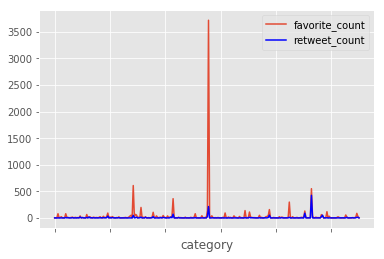

In [55]:
ax = plt.gca()

pd_df.plot(kind="line", x="category",y="favorite_count",ax=ax)
pd_df.plot(kind="line", x="category",y="retweet_count", color="blue",ax=ax)

#plt.show()


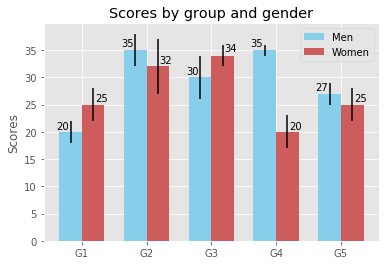

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()